In [1]:
import dropbox
import os
import numpy as np
import pandas as pd
from scipy.stats import t
import math
import collections
from PIL import Image
from dropbox import DropboxOAuth2FlowNoRedirect
import matplotlib.pyplot as plt
import cv2
import pypyodbc
import sys
import traceback
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import BatchNormalization, concatenate, Input, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical  #?
from keras.optimizers import Adam
from keras.metrics import categorical_accuracy

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
cnxn = pypyodbc.connect("Driver={ODBC Driver 17 for SQL Server};"
                      "Server=028-GUMUS1-SRV;"
                      "Database=KOTON_DB;"
                      "Trusted_Connection=yes;")

In [4]:
from keras.models import load_model
model = load_model('model20181203-163204.h5')

59999
7YAM15203LK617


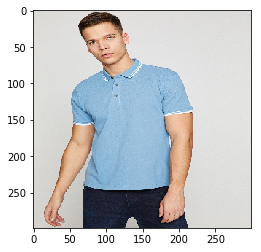

59999
60000
7YAM15203LK618


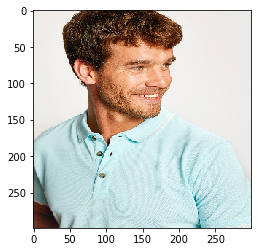

60000
60001
7YAM15203LK645


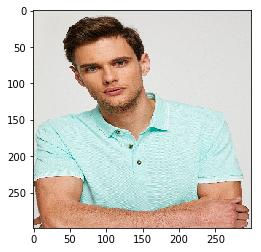

60001
60002
7YAM15203LK751


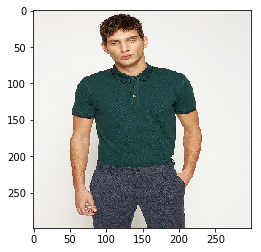

60002
60003
7YAM15210OK000


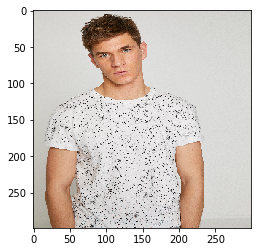

60003
60004
7YAM15210OK999


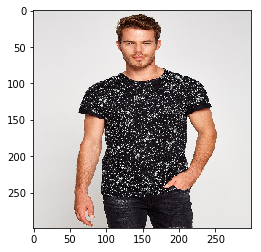

60004
60005
7YAM15224OK027


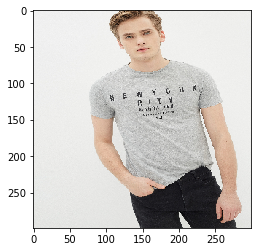

60005
60006
7YAM15237LK000


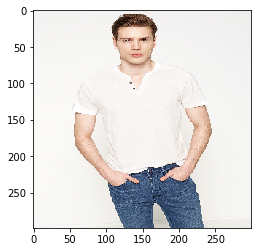

60006
60007
7YAM15237LK023


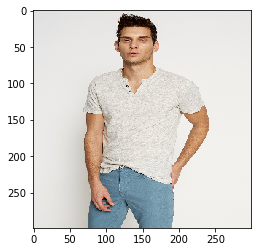

60007
60008
7YAM15237LK600


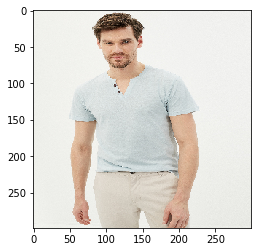

60008
60009
7YAM15237LK660


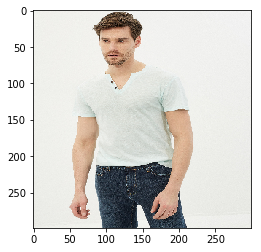

60009
60010
7YAM15237LKBT4


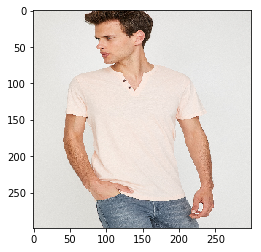

60010
60011
7YAM15324LK151


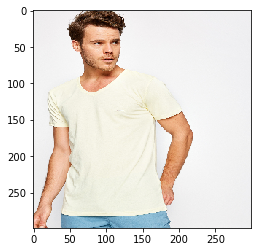

60011
60012
7YAM15324LK443


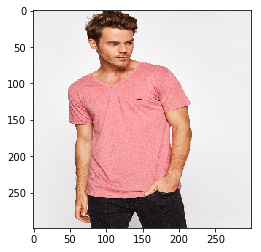

60012
60013
7YAM15324LK480


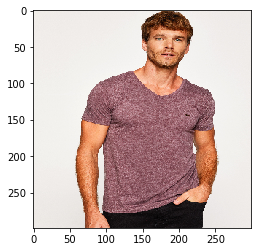

60013


In [5]:
retrieved_image_df = pd.read_excel('C:/Users/Recep/Koton/Data/retrieved_image_list.xlsx', sheet_name='Sheet1')
access_token='0DQLcsXIojcAAAAAAAgybeB3DOmXKK7bRTLyYwkthbrAiGmpQR4AuGINQkjBXhif'
dbx = dropbox.Dropbox(access_token)
im_type = ['image1', 'image2', 'image3', 'image4', 'image5']
data_x = []
y_dummy = np.array([15, 21, 2, 6, 5])
codes = []

nb_train_samples = 15
batch_size = 5
count = 0

for i in range(59999  , 59999 + nb_train_samples): # UNSEEN DATA
    try:
        print(i)
        code = retrieved_image_df.iloc[i].name
        print(code)
        im_index = retrieved_image_df.iloc[i][im_type[0]+'_index']
        codes.append(code)
        filename = str(code)+'_'+im_type[0]+'_'+str(int(im_index))+'.jpg'
        path = '/Koton_Image_Files/'+filename
        md, res = dbx.files_download(path)
        data_x.append(cv2.resize(cv2.imdecode(np.frombuffer(res.content, dtype=np.uint8), -1), (299,299)))
        plt.imshow(cv2.cvtColor(cv2.resize(cv2.imdecode(np.frombuffer(res.content, dtype=np.uint8), -1), (299,299)), cv2.COLOR_BGR2RGB))
        plt.show()
        print(i)
    except Exception as e: 
        print(e)
        count += 1
        

In [7]:
bn_model = Xception(include_top=False, weights='imagenet', pooling='max')
_ = bn_model.predict(np.array(data_x))
probs = model.predict(_)
y_classes = probs.argmax(axis=-1)
preds = pd.DataFrame(y_classes, index=codes, columns=['Predictions'])

In [8]:
string_tar = "SELECT [OptionCode] \
      ,[Groups] \
  FROM [KOTON_DB].[dbo].[Ratio_table_gruouped] Where ("

_ =[]
flag2 = True
for i in codes: 
    if flag2:
        _.append("OptionCode='"+i+"'")
        flag2 = False
    else:
        _.append(" OR OptionCode='"+i+"'")
                    
query = string_tar + ''.join(_) + ')'
real = pd.read_sql_query(query, cnxn, index_col='optioncode')


In [11]:
pd.concat([real, preds], axis=1, join='inner') 
# 0.65 0.059

,groups,Predictions
7YAM15203LK645,0.3-0.4,0
7YAM15237LK600,0.1-0.2,0
7YAM15237LKBT4,0.1-0.2,0
7YAM15324LK151,0.4-0.5,0
7YAM15203LK617,0.1-0.2,0
7YAM15224OK027,0.9-1,0
7YAM15237LK023,0.2-0.3,0
7YAM15237LK660,0.4-0.5,0
7YAM15324LK443,0.2-0.3,0
7YAM15210OK000,0-0.1,0
